In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [89]:
spin_df = pd.read_csv('/Users/char8060/Documents/hundredboats.csv')

In [90]:
spin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Index        47 non-null     int64 
 1   Sail_number  47 non-null     object
 2   boat_name    47 non-null     object
 3   Skipper      47 non-null     object
 4   yacht_club   47 non-null     object
 5   city         47 non-null     object
 6   boat         47 non-null     object
 7   loa          47 non-null     object
 8   PHRF         47 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 3.4+ KB


In [91]:
X = spin_df['PHRF']

In [92]:
dbscan = DBSCAN(eps=4, min_samples=3).fit(X.values.reshape(-1,1))
kmeans = KMeans(n_clusters=7, random_state=0).fit(X.values.reshape(-1, 1))

In [93]:
spin_df['cluster_label'] = kmeans.labels_

In [94]:
spin_df = spin_df.sort_values(by='PHRF')

In [95]:
spin_df

,Index,Sail_number,boat_name,Skipper,yacht_club,city,boat,loa,PHRF,cluster_label
43,44,USA 52012,Vincitore,Gary Feracota / Jim Banovitz,Chicago Yacht Club,"Hawthorn Woods, IL, USA",RP52,52,-81,5
17,18,USA 40048,Inferno,Philip Dowd,Chicago Yacht Club,"Chicago, IL, USA",Farr 40,40,-12,3
36,37,USA 26,Renegade,Thomas Papoutsis,Columbia,"Winnetka, IL, USA",J 133,43,15,1
10,11,USA 35053,Entourage II,Michael Dannecker,CYC,"Chicago, IL, USA",1D35,35,24,1
20,21,USA 131,Lucy,Jeremy Alexis,JPYC,"Chicago, IL, USA",Melges 32,32,24,1
9,10,USA 38006,Eagle,Shawn/Jerry O'Neill,CYC,"Chicago, IL, USA",Sydney 38,38,27,1
33,34,USA 112,Pura Vida,John Kalanik,CCYC,"Chicago, IL, USA",J 111,36.5,36,1
24,25,USA 24,Momentus,Kevin Saedi / Raman Yousefi,Columbia Yacht Club,"Oak Park, IL, USA",J 111,36.5,36,1
16,17,USA 60111,HeadRoom,Boyd Jarrell,Columbia YC /JPYC,"Flossmoor, IL, USA",J 111,36.5,36,1
18,19,USA 52039,Jahazi,Frank Giampoli,Columbia YC,"Geneva, IL, USA",J 120,40,51,4


In [96]:
cluster_label = 0
cluster_list = []
for i, label in enumerate(spin_df.cluster_label):
    #if different from previous label, increment label
    if spin_df.cluster_label.iloc[i] != spin_df.cluster_label.iloc[i-1]:
        cluster_label +=1

    #append to list
    cluster_list.append(cluster_label)
    
spin_df['spin_section'] = cluster_list

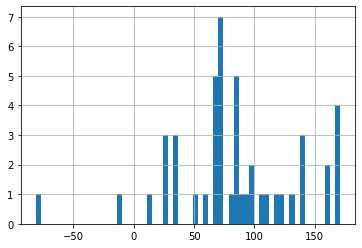

In [103]:
spin_df['PHRF'].hist(bins=60)

In [98]:
spin_df.to_csv('section_breaks.csv')